In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Генерируем данные для задачи регрессии: 50 объектов, которые состоят из 1 признака, при этом он один полезный. Так же добавим немного шума, чтобы модели было не так легко обучаться.

In [2]:
X, y, coef = make_regression(n_samples=50, n_features=1, n_informative=1, noise=10, coef=True, random_state=11)
display(X, y, coef)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

array(80.65667909)

Виузализируем наши данные.
Feature(x) - признак, на котором модель будет обучаться.
Target(y) - целевое значение, которое модель должна предсказать.

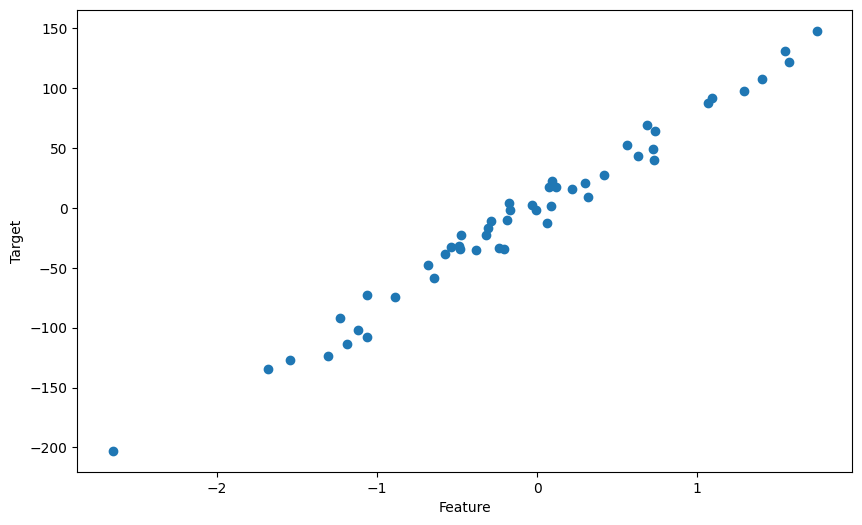

In [3]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

Возьмем модель линейной регрессии и передадим в неё метод fit, в котором будут признаки(х) и целевые значения (у)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
model

LinearRegression()

Посмотрим на коэффициенты сдвига и наклона

In [5]:
model_a = model.coef_[0],
model_b = model.intercept_
print(model_a, model_b)

(np.float64(80.41862353979865),) 0.1817188754210024


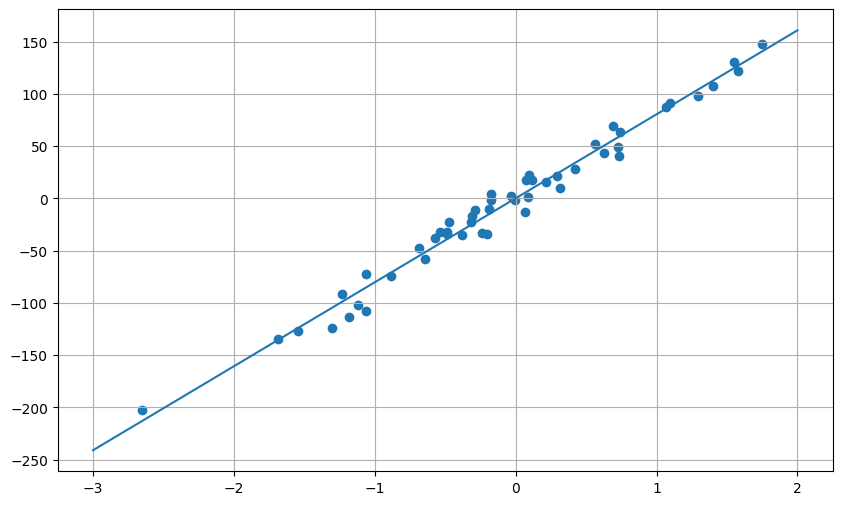

In [6]:
fig = plt.figure(figsize=(10,6))

x = np.arange(-3,3)
model_y_sk = model_a*x + model_b

plt.plot(x, model_y_sk)
plt.scatter(X,y)
plt.grid()
plt.show()

Чтобы сделать предсказание, вызываем метод predict и передаем в него данные.

In [7]:
model.predict(X[:1])

array([50.85187092])

Чтобы оценить качество модели, посчитаем метрику MSE - среднюю квадратичную ошибку, и её градиент (отдельно для сдвига и отдельно для наклона)

In [8]:
def mse(X, w1, w0, y):
  y_pred = w1 * X[:,0] + w0
  return np.sum((y - y_pred)**2) / len(y_pred)

def grad(X, w1, w0, y):
  y_pred = w1 * X[:,0] + w0
  return np.array([2/len(X)*np.sum(y-y_pred)*(-1),
                   2/len(X)*np.sum((y-y_pred)*(-X[:,0]))])


Теперь запустим цикл градиентнового спуска.
е - минимальное значение, на которое должны изменяться веса

In [9]:
e = 0.0001
w0 = 0
w1 = 0
learning_rate = 0.1
next_w0 = w0
next_w1 = w1
n = 100

for i in range(n):
  cur_w0 = next_w0
  cur_w1 = next_w1

  next_w0 = cur_w0 - learning_rate * grad(X, cur_w1, cur_w0, y)[0]
  next_w1 = cur_w1 - learning_rate * grad(X, cur_w1, cur_w0, y)[1]

  print(f'Итерация: {i}')
  print(f'Текущая точка {cur_w1, cur_w0} | Cледующая точка: {next_w1, next_w0}')
  print(f"MSE {mse(X, cur_w1, cur_w0, y)}")
  print('---------------------------------------------------------------------')

  if (abs(cur_w1 - next_w1) <= e) and (abs(cur_w0 - next_w0) <= e):
    break

Итерация: 0
Текущая точка (0, 0) | Cледующая точка: (np.float64(13.245106098282543), np.float64(-1.3921748530551812))
MSE 5436.432058517568
---------------------------------------------------------------------
Итерация: 1
Текущая точка (np.float64(13.245106098282543), np.float64(-1.3921748530551812)) | Cледующая точка: (np.float64(24.283455474773014), np.float64(-2.270634896573517))
MSE 3812.4417335187304
---------------------------------------------------------------------
Итерация: 2
Текущая точка (np.float64(24.283455474773014), np.float64(-2.270634896573517)) | Cледующая точка: (np.float64(33.487719285860635), np.float64(-2.777322881591963))
MSE 2689.1325642433894
---------------------------------------------------------------------
Итерация: 3
Текущая точка (np.float64(33.487719285860635), np.float64(-2.777322881591963)) | Cледующая точка: (np.float64(41.166652649401456), np.float64(-3.0191730536904307))
MSE 1910.2491839412482
------------------------------------------------------

Если мы посчитаем MSE, объединив данные в талицу, то получится такое же значение:

In [10]:
df = pd.DataFrame({
    'X': X[:,0],
    'y': y,
    'pred': model_a * X[:,0] + model_b,
})
df['residual'] = df['pred'] - df['y']
print(df.head())
print('MSE = ', np.mean(df['residual'] ** 2))

          X           y        pred   residual
0  0.630080   43.654341   50.851871   7.197530
1 -1.061634  -72.682350  -85.193462 -12.511112
2  0.296347   21.196446   24.013545   2.817099
3  1.402771  107.587651  112.990641   5.402991
4  0.689682   69.620632   55.645021 -13.975611
MSE =  111.93097544862604


# **РЕАЛИЗАЦИЯ МНОГОМЕРНОЙ ЛИНЕЙНОЙ РЕГРЕССИИ**

Сгенерируем данные, состоящие из 4 информативных признаков

In [11]:
X, y, coef = make_regression(n_samples=50, n_features=4, n_informative=4, noise=10, coef=True, random_state=11)
display(X, y, coef)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

array([59.32158596, 58.74342238, 44.07539836, 25.03682142])

Добавим фиктивный признак свободному весу (w0), чтобы он вписывался в скалярное произведение

In [12]:
X = np.column_stack([X, np.ones((50))])
X

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699,  1.        ],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ,  1.        ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ,  1.        ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254,  1.        ],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489,  1.        ],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858,  1.        ],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514,  1.        ],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215,  1.        ],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692,  1.        ],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398,  1.        ],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163,  1.        ],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665,  1.        ],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487,  1.        ],
       [-1.0616544 , -0.68448467, -0.4

Теперь используем функции mse и grad и запускаем цикл

In [13]:
def mse(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred) ** 2) / len(y_pred)

def grad(X, w, y):
    y_pred = X @ w
    return 2/len(X)*(y - y_pred) @ (-X)

weights = np.zeros(X.shape[1])
eps = 0.0001
learning_rate = 0.1
next_weights = weights
n = 100

for i in range(n):
    cur_weights = next_weights

    next_weights = cur_weights - learning_rate * grad(X, cur_weights, y)

    print(f"Итерация: {i}")
    print(f"Текущая точка {cur_weights}| Следующая точка {next_weights}")
    print(f"MSE {mse(X, cur_weights, y)}")
    print("--------------------------------------------------------")

    if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
        break

Итерация: 0
Текущая точка [0. 0. 0. 0. 0.]| Следующая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]
MSE 7901.284047919273
--------------------------------------------------------
Итерация: 1
Текущая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]| Следующая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]
MSE 5491.413352110748
--------------------------------------------------------
Итерация: 2
Текущая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]| Следующая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]
MSE 3846.369420368778
--------------------------------------------------------
Итерация: 3
Текущая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]| Следующая точка [34.38479911 26.29452131 22.40202941 10.84471509 -2.06001325]
MSE 2714.9929661406427
--------------------------------------------------------
Итерация: 4
Текущая точка [34.38479911 26.29452131 22.402029

Если сравним с решением "В лоб", то получится аналогичный ответ

In [14]:
model = LinearRegression()
model.fit(X, y)

df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = model.predict(X)
df['pred_dot'] = X.dot(model.coef_) + model.intercept_
df['residual'] = df['pred_fit'] - df['y']
print(df.head())
print('MSE =', np.mean(df['residual'] ** 2))

          0         1         2         3    4          y   pred_fit  \
0  0.858667 -1.264074  1.114870  0.434777  1.0  43.599074  37.148975   
1  1.291275 -0.964205  0.071760  0.271606  1.0  33.322613  29.511654   
2  1.067558 -1.061634  0.217348  0.117820  1.0  12.928429  13.257486   
3  0.071020  0.921575 -0.376830  0.919983  1.0  56.762091  61.820454   
4  0.275407  0.186325 -1.139806  0.141805  1.0 -28.240755 -21.923992   

    pred_dot  residual  
0  37.148975 -6.450099  
1  29.511654 -3.810959  
2  13.257486  0.329057  
3  61.820454  5.058363  
4 -21.923992  6.316763  
MSE = 92.64429127220507
